<a href="https://colab.research.google.com/github/MathewS424/PyTorch-Tutorial/blob/main/20_Card_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BUILD YOUR FIRST PYTORCH MODEL IN MINUTES - PLAYINGCARD CLASSIFICATION**

**LINK - [https://www.kaggle.com/code/robikscube/train-your-first-pytorch-model-card-classifier](https://www.kaggle.com/code/robikscube/train-your-first-pytorch-model-card-classifier)**

Train Your Very First Pytorch Model!¶
Let's learn through doing.

In this notebook we will create an image classifier to detect playing cards.

We will tackle this problem in 3 parts:

  Pytorch Dataset  
  Pytorch Model  
  Pytorch Training Loop

Almost every pytorch model training pipeline meets this paradigm.

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm  #import timm is a Python command used to import the timm library, which stands for "PyTorch Image Models"

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

In [7]:
print('System Version:', sys.version)
print('PyTorch version', torch.__version__)
print('Torchvision version', torchvision.__version__)
print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)

System Version: 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
PyTorch version 2.3.1+cu121
Torchvision version 0.18.1+cu121
Numpy version 1.26.4
Pandas version 2.1.4


#**Step 1.** **Pytorch Dataset (and Dataloader)**    
Would you learn how to bake a cake without first having the ingredients? No.

The same thing can be said for training a pytorch model without first having the dataset setup correctly.

This is why datasets are important:

  It's an organized way to structure how the data and labels are loaded into the model.

We can then wrap the dataset in a dataloader and pytorch will handle batching the shuffling the data for us when training the model!

In [9]:
class PlayingCardDataset(Dataset):
  def __init__(self, data_dir, transform=None):
    self.data = ImageFolder(data_dir, transform=transform)

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    return self.data[idx]

  @property
  def classes(self):
    return self.data.classes

In [10]:
dataset = PlayingCardDataset(
    data_dir='/kaggle/input/cards-image-datasetclassification/train'
)  # for kaggle notebook

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/cards-image-datasetclassification/train'

In [18]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [19]:
zip_path = '/content/drive/My Drive/Card_datasets/archive.zip'


In [20]:
import os

extract_path = '/content/playing_card_dataset'
os.makedirs(extract_path, exist_ok=True)


In [21]:
import zipfile

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extracted to {extract_path}")


Dataset extracted to /content/playing_card_dataset


In [22]:
import os

# List the files in the extracted directory
extracted_files = os.listdir(extract_path)
print("Files in extracted directory:", extracted_files)


Files in extracted directory: ['train', 'cards.csv', '53cards-53-(200 X 200)-100.00.h5', 'test', '14card types-14-(200 X 200)-94.61.h5', 'valid']


In [23]:
dataset = PlayingCardDataset(
    data_dir='/content/playing_card_dataset'
)

In [24]:
len(dataset)   # full datasets len

8154

In [25]:
dataset[5]  # (image, label)

(<PIL.Image.Image image mode=RGB size=224x224>, 0)

0


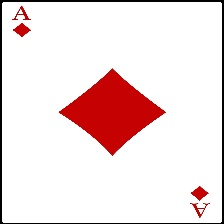

In [30]:
image, label = dataset[5]
print(label)
image

In [31]:
dataset = PlayingCardDataset(
    data_dir='/content/playing_card_dataset/train'
)

In [32]:
len(dataset)      # train datasets len

7624

In [28]:
# Get a dictionary associating target values with folder names
data_dir = '/content/playing_card_dataset/train'
target_to_class = {v: k for k, v in ImageFolder(data_dir).class_to_idx.items()}
print(target_to_class)

{0: 'ace of clubs', 1: 'ace of diamonds', 2: 'ace of hearts', 3: 'ace of spades', 4: 'eight of clubs', 5: 'eight of diamonds', 6: 'eight of hearts', 7: 'eight of spades', 8: 'five of clubs', 9: 'five of diamonds', 10: 'five of hearts', 11: 'five of spades', 12: 'four of clubs', 13: 'four of diamonds', 14: 'four of hearts', 15: 'four of spades', 16: 'jack of clubs', 17: 'jack of diamonds', 18: 'jack of hearts', 19: 'jack of spades', 20: 'joker', 21: 'king of clubs', 22: 'king of diamonds', 23: 'king of hearts', 24: 'king of spades', 25: 'nine of clubs', 26: 'nine of diamonds', 27: 'nine of hearts', 28: 'nine of spades', 29: 'queen of clubs', 30: 'queen of diamonds', 31: 'queen of hearts', 32: 'queen of spades', 33: 'seven of clubs', 34: 'seven of diamonds', 35: 'seven of hearts', 36: 'seven of spades', 37: 'six of clubs', 38: 'six of diamonds', 39: 'six of hearts', 40: 'six of spades', 41: 'ten of clubs', 42: 'ten of diamonds', 43: 'ten of hearts', 44: 'ten of spades', 45: 'three of clu

In [38]:
# Ensure all images in datasets are same size
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])  # Resize all images to 128x128 pixels and convert it to tensor

data_dir = '/content/playing_card_dataset/train'
dataset = PlayingCardDataset(data_dir, transform)


In [34]:
dataset[100]

(tensor([[[0.0000, 0.0039, 0.0078,  ..., 0.0039, 0.0039, 0.0039],
          [0.0039, 0.0078, 0.0431,  ..., 0.0196, 0.0039, 0.0078],
          [0.0235, 0.0392, 0.3490,  ..., 0.2392, 0.0314, 0.0118],
          ...,
          [0.0039, 0.0235, 0.2392,  ..., 0.2196, 0.0314, 0.0118],
          [0.0039, 0.0039, 0.0235,  ..., 0.0118, 0.0078, 0.0039],
          [0.0039, 0.0078, 0.0039,  ..., 0.0039, 0.0039, 0.0039]],
 
         [[0.0078, 0.0078, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0392,  ..., 0.0196, 0.0039, 0.0078],
          [0.0078, 0.0275, 0.3373,  ..., 0.2392, 0.0275, 0.0078],
          ...,
          [0.0039, 0.0235, 0.2431,  ..., 0.2196, 0.0314, 0.0078],
          [0.0039, 0.0039, 0.0235,  ..., 0.0157, 0.0078, 0.0039],
          [0.0039, 0.0078, 0.0039,  ..., 0.0078, 0.0078, 0.0039]],
 
         [[0.0196, 0.0196, 0.0118,  ..., 0.0118, 0.0118, 0.0118],
          [0.0118, 0.0078, 0.0353,  ..., 0.0157, 0.0039, 0.0078],
          [0.0118, 0.0196, 0.3137,  ...,

In [36]:
image, label = dataset[100]
print(label)
print(image.shape) # output:torch.Size([3, 128, 128]) 3 is channel red , green, blue
image   # No picture since its converted to tensor

0
torch.Size([3, 128, 128])


tensor([[[0.0000, 0.0039, 0.0078,  ..., 0.0039, 0.0039, 0.0039],
         [0.0039, 0.0078, 0.0431,  ..., 0.0196, 0.0039, 0.0078],
         [0.0235, 0.0392, 0.3490,  ..., 0.2392, 0.0314, 0.0118],
         ...,
         [0.0039, 0.0235, 0.2392,  ..., 0.2196, 0.0314, 0.0118],
         [0.0039, 0.0039, 0.0235,  ..., 0.0118, 0.0078, 0.0039],
         [0.0039, 0.0078, 0.0039,  ..., 0.0039, 0.0039, 0.0039]],

        [[0.0078, 0.0078, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
         [0.0039, 0.0039, 0.0392,  ..., 0.0196, 0.0039, 0.0078],
         [0.0078, 0.0275, 0.3373,  ..., 0.2392, 0.0275, 0.0078],
         ...,
         [0.0039, 0.0235, 0.2431,  ..., 0.2196, 0.0314, 0.0078],
         [0.0039, 0.0039, 0.0235,  ..., 0.0157, 0.0078, 0.0039],
         [0.0039, 0.0078, 0.0039,  ..., 0.0078, 0.0078, 0.0039]],

        [[0.0196, 0.0196, 0.0118,  ..., 0.0118, 0.0118, 0.0118],
         [0.0118, 0.0078, 0.0353,  ..., 0.0157, 0.0039, 0.0078],
         [0.0118, 0.0196, 0.3137,  ..., 0.2196, 0.0235, 0.

In [37]:
# iterate over dataset
for image, label in dataset:
    break
print(label)
image

0


tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.0784, 0.0824, 0.0745,  ..., 1.0000, 1.0000, 1.0000],
         [0.7490, 0.7451, 0.7412,  ..., 1.0000, 1.0000, 1.0000],
         [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.0745, 0.0784, 0.0706,  ..., 1.0000, 1.0000, 1.0000],
         [0.7451, 0.7451, 0.7373,  ..., 1.0000, 1.0000, 1.0000],
         [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.

**Dataloaders**      
Batching our dataset
It's faster to train the model in batches instead of one at a time.                       
**Shuffle = True for training and False for Testing**

In [39]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [43]:
for image, label in dataloader:
    break
image.shape, label.shape  # (torch.Size([32, 3, 128, 128]), torch.Size([32])) 32 batches
print(label)
print(image)

tensor([24, 36, 14, 28, 20, 39, 20, 25, 19,  0,  6, 28, 14, 34, 21, 49,  9, 13,
         3, 10, 32, 44, 34, 12, 31, 32, 12, 11, 28, 42, 50, 35])
tensor([[[[0.9961, 0.9961, 1.0000,  ..., 1.0000, 0.9961, 1.0000],
          [0.9922, 0.9961, 1.0000,  ..., 0.9961, 0.9961, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 0.9922, 0.9961, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 0.9882, 0.9882, 0.9922],
          [0.9961, 1.0000, 1.0000,  ..., 0.9922, 0.9961, 0.9961],
          [0.9961, 0.9961, 1.0000,  ..., 0.9922, 1.0000, 0.9961]],

         [[0.9961, 0.9961, 1.0000,  ..., 1.0000, 0.9961, 1.0000],
          [0.9922, 0.9961, 1.0000,  ..., 0.9961, 0.9961, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 0.9922, 0.9961, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 0.9882, 0.9882, 0.9922],
          [0.9961, 1.0000, 1.0000,  ..., 0.9922, 0.9961, 0.9961],
          [0.9961, 0.9961, 1.0000,  ..., 0.9922, 1.0000, 0.9961]],

         [[0.9961, 0.9961, 1.



**### Understanding the `DataLoader` and Output Shapes**

1. **`DataLoader` Creation:**

   ```python
   dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
   ```

   - **`dataset`**: This is the dataset you created using `PlayingCardDataset`.
   - **`batch_size=32`**: This means that each batch will contain 32 images and their corresponding labels.
   - **`shuffle=True`**: This means the dataset will be shuffled before being divided into batches. This helps in training by ensuring the model doesn’t see the images in the same order every epoch.

2. **Iterating Through the DataLoader:**

   ```python
   for image, label in dataloader:
       break
   ```

   - This loop gets one batch of images and labels from the `dataloader`.
   - `break` exits the loop after the first batch is retrieved, so you’re only looking at the first batch.

3. **Understanding the Output Shapes:**

   ```python
   image.shape, label.shape
   ```

   The shapes are:

   - **`image.shape`**: `torch.Size([32, 3, 128, 128])`
     - **32**: This is the batch size, so there are 32 images in the batch.
     - **3**: This is the number of color channels (RGB) for each image.
     - **128x128**: This is the height and width of each image after resizing.

   - **`label.shape`**: `torch.Size([32])`
     - **32**: This is the number of labels, corresponding to the 32 images in the batch. Each label is a single integer representing the class of the corresponding image.

### Summary

- The `DataLoader` divides the dataset into batches. Each batch has a size of 32 images and their corresponding labels, as specified by `batch_size=32`.
- **`image.shape`** indicates that each batch contains 32 images, where each image has 3 color channels and is of size 128x128 pixels.
- **`label.shape`** indicates that there are 32 labels, one for each image in the batch.

So yes, each batch from the `DataLoader` contains 32 images, and each image has the dimensions `(3, 128, 128)`.

# Step 2. Pytorch Model
Pytorch datasets have a structured way of organizing your data, pytorch models follow a similar paradigm.

We could create the model from scratch defining each layer.
                               
However for tasks like image classification, many of the state of the art architectures are readily available and we can import them from packages like timm.                                  
Understanding the pytorch model is all about understanding the shape the data is at each layer, and the main one we need to modify for a task is the final layer. Here we have 53 targets, so we will modify the last layer for this.

In [ ]:
class SimpleCardClassifier(nn.Module):
  def __init__(self, num_classes=53):
    super().__init__()
    self.base_model = timm.create_model('efficientnet_b0', pretrained=True, num_classes=0)

  def forward(self, x):
    return self.model(x)